In [1]:
#std libs
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
print(np.__version__)
print(tf.__version__)

1.23.5
2.10.0


In [3]:
'''
Initial params
'''

# Choose the appliance-specific window size
window_size = 512

# Threshold of 15 Watt for detecting the ON/OFF states
THRESHOLD = 15

In [2]:
# load in data from ukdale datasets
house_1_dw=pd.read_table('datasets/ukdale/house_1/channel_6.dat',delimiter='\s+')
house_1_fr=pd.read_table('datasets/ukdale/house_1/channel_12.dat',delimiter='\s+')
house_1_ke=pd.read_table('datasets/ukdale/house_1/channel_10.dat',delimiter='\s+')
house_1_mw=pd.read_table('datasets/ukdale/house_1/channel_13.dat',delimiter='\s+')
house_1_wm=pd.read_table('datasets/ukdale/house_1/channel_5.dat',delimiter='\s+')

house_2_ke = pd.read_table('datasets/ukdale/house_2/channel_8.dat',delimiter='\s+')

house_3_ke = pd.read_table('datasets/ukdale/house_3/channel_2.dat',delimiter='\s+')

house_4_ke = pd.read_table('datasets/ukdale/house_4/channel_3.dat',delimiter='\s+')


house_5_ke = pd.read_table('datasets/ukdale/house_5/channel_18.dat',delimiter='\s+')
house_5_dw = pd.read_table('datasets/ukdale/house_5/channel_22.dat',delimiter='\s+')
house_5_mw = pd.read_table('datasets/ukdale/house_5/channel_23.dat',delimiter='\s+')

In [3]:
# get aggregate power signals for homes
house_1=pd.read_table('datasets/ukdale/house_1/channel_1.dat',delimiter='\s+')
house_2=pd.read_table('datasets/ukdale/house_2/channel_1.dat',delimiter='\s+')
house_3=pd.read_table('datasets/ukdale/house_3/channel_1.dat',delimiter='\s+')
house_4=pd.read_table('datasets/ukdale/house_4/channel_1.dat',delimiter='\s+')
house_5=pd.read_table('datasets/ukdale/house_5/channel_1.dat',delimiter='\s+')

In [4]:
# standardise all data to be between scale 0-1
def standardize_data(data,data_min,data_max):

    data_scaled = (data - data_min) / (data_max - data_min)

    return data_scaled

In [8]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [5]:
# train a model to predict ke usage
# rename columns
house_1_ke.columns=['time','app_pow']
house_3_ke.columns=['time','app_pow']
house_4_ke.columns=['time','app_pow']
house_5_ke.columns=['time','app_pow']

house_1.columns=['time','agg_pow']
house_3.columns=['time','agg_pow']
house_4.columns=['time','agg_pow']
house_5.columns=['time','agg_pow']

In [6]:
# classify on state
THRESHOLD=5
house_1_ke['on']=house_1_ke['app_pow']>THRESHOLD
house_3_ke['on']=house_3_ke['app_pow']>THRESHOLD
house_4_ke['on']=house_4_ke['app_pow']>THRESHOLD
house_5_ke['on']=house_5_ke['app_pow']>THRESHOLD


In [7]:
#merge aggregate and appliance data
house_1_merge = pd.merge(house_1_ke,house_1,on='time',how='inner')
house_3_merge = pd.merge(house_3_ke,house_3,on='time',how='inner')
house_4_merge = pd.merge(house_4_ke,house_4,on='time',how='inner')
house_5_merge = pd.merge(house_5_ke,house_5,on='time',how='inner')


In [8]:
merged_data=pd.concat([house_1_merge,house_3_merge,house_4_merge,house_5_merge])

In [9]:

merged_data.reset_index(inplace=True,drop=True)


In [10]:
merged_data

,time,app_pow,on,agg_pow
0,1352500218,1,False,587
1,1352500224,1,False,592
2,1352500230,1,False,587
3,1352500236,1,False,585
4,1352500242,1,False,583
...,...,...,...,...
4319628,1410083128,2,False,3424
4319629,1410083170,2,False,3534
4319630,1410083176,2,False,3423
4319631,1410083188,2,False,3499


In [19]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(merged_data.index,merged_data['pow_appliance'],color='red')
ax.plot(merged_data.index,merged_data['pow'],color='blue')
plt.show()

: 

: 

In [11]:
df_5min=merged_data.iloc[::300]
df_5min.reset_index(inplace=True,drop=True)
df_5min

,time,app_pow,on,agg_pow
0,1352500218,1,False,587
1,1352502674,1,False,353
2,1352505025,1,False,378
3,1352508077,1,False,229
4,1352511444,1,False,138
...,...,...,...,...
14394,1409514617,2,False,1745
14395,1409606532,2,False,3444
14396,1409772741,2,False,1472
14397,1409860586,2,False,1463


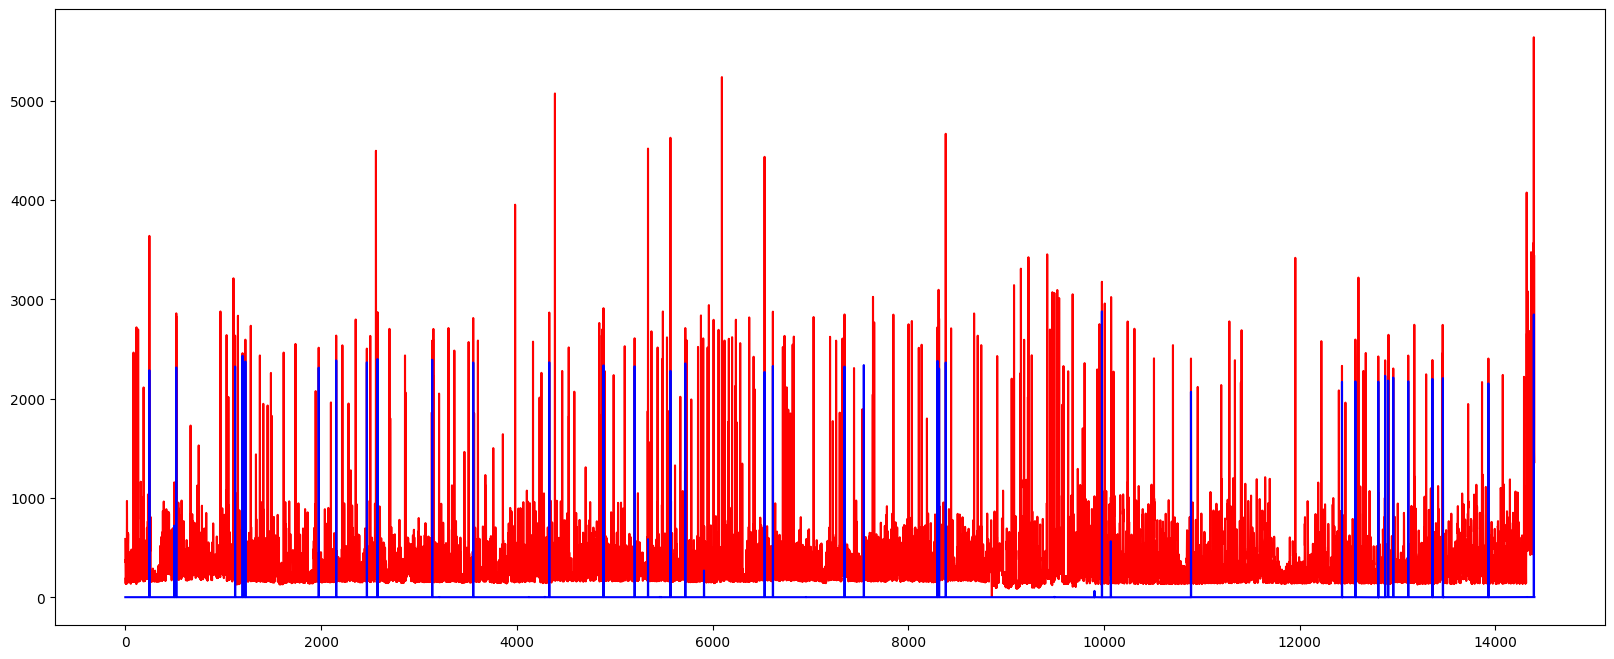

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_5min.index,df_5min['agg_pow'],color='red')
ax.plot(df_5min.index,df_5min['app_pow'],color='blue')
plt.show()

In [12]:
#standardise columns
data_min= df_5min['agg_pow'].min()
data_max= df_5min['agg_pow'].max()
df_5min['agg_pow']=standardize_data(df_5min['agg_pow'],data_min=data_min,data_max=data_max)
df_5min['app_pow']=standardize_data(df_5min['app_pow'],data_min=data_min,data_max=data_max)


C:\Users\marco\AppData\Local\Temp\ipykernel_15408\1169701049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5min['agg_pow']=standardize_data(df_5min['agg_pow'],data_min=data_min,data_max=data_max)
C:\Users\marco\AppData\Local\Temp\ipykernel_15408\1169701049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5min['app_pow']=standardize_data(df_5min['app_pow'],data_min=data_min,data_max=data_max)


In [13]:
df_5min

,time,app_pow,on,agg_pow
0,1352500218,-0.000532,False,0.103461
1,1352502674,-0.000532,False,0.061934
2,1352505025,-0.000532,False,0.066371
3,1352508077,-0.000532,False,0.039929
4,1352511444,-0.000532,False,0.023780
...,...,...,...,...
14394,1409514617,-0.000355,False,0.308962
14395,1409606532,-0.000355,False,0.610470
14396,1409772741,-0.000355,False,0.260515
14397,1409860586,-0.000355,False,0.258917


In [14]:
df_model=pd.DataFrame()
df_model['time']=df_5min['time']
df_model['agg_pow']=df_5min['agg_pow']
df_model['on']=df_5min['on']
df_model['app_pow']=df_5min['app_pow']
df_model

,time,agg_pow,on,app_pow
0,1352500218,0.103461,False,-0.000532
1,1352502674,0.061934,False,-0.000532
2,1352505025,0.066371,False,-0.000532
3,1352508077,0.039929,False,-0.000532
4,1352511444,0.023780,False,-0.000532
...,...,...,...,...
14394,1409514617,0.308962,False,-0.000355
14395,1409606532,0.610470,False,-0.000355
14396,1409772741,0.260515,False,-0.000355
14397,1409860586,0.258917,False,-0.000355


In [23]:
df_model

,time,agg_pow,on,app_pow
0,1352500218,0.103461,False,-0.000532
1,1352502674,0.061934,False,-0.000532
2,1352505025,0.066371,False,-0.000532
3,1352508077,0.039929,False,-0.000532
4,1352511444,0.023780,False,-0.000532
...,...,...,...,...
14394,1409514617,0.308962,False,-0.000355
14395,1409606532,0.610470,False,-0.000355
14396,1409772741,0.260515,False,-0.000355
14397,1409860586,0.258917,False,-0.000355


In [22]:
temp=df_5min['app_pow']
df_5min['app_pow']=df_5min['agg_pow']
df_5min['app_pow']=temp
df_5min.rename(columns={"app_pow": "agg_pow"})

C:\Users\marco\AppData\Local\Temp\ipykernel_26396\14589805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5min['app_pow']=df_5min['agg_pow']
C:\Users\marco\AppData\Local\Temp\ipykernel_26396\14589805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5min['app_pow']=temp


,time,agg_pow,on,agg_pow
0,1352500218,-0.000532,False,0.103461
1,1352502674,-0.000532,False,0.061934
2,1352505025,-0.000532,False,0.066371
3,1352508077,-0.000532,False,0.039929
4,1352511444,-0.000532,False,0.023780
...,...,...,...,...
14394,1409514617,-0.000355,False,0.308962
14395,1409606532,-0.000355,False,0.610470
14396,1409772741,-0.000355,False,0.260515
14397,1409860586,-0.000355,False,0.258917


In [ ]:
# create columns for day sin/cos and year sin/cos
day = 60*60*24
year = 365.2425*day

df_5min['Day sin'] = np.sin(df_5min['time'] * (2* np.pi / day))
df_5min['Day cos'] = np.cos(df_5min['time'] * (2 * np.pi / day))
df_5min['Year sin'] = np.sin(df_5min['time'] * (2 * np.pi / year))
df_5min['Year cos'] = np.cos(df_5min['time'] * (2 * np.pi / year))

## Create LSTM Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(10, 2)))
model1.add(LSTM(units=140,return_sequences=True))
model1.add(LSTM(units=140))
model1.add(Dense(1, activation='sigmoid'))


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 140)           80080     
                                                                 
 lstm_1 (LSTM)               (None, 140)               157360    
                                                                 
 dense (Dense)               (None, 1)                 141       
                                                                 
Total params: 237,581
Trainable params: 237,581
Non-trainable params: 0
_________________________________________________________________


In [17]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [18]:
#split x and y for train
x_train = df_model[['time','agg_pow']]
y_class_train =df_model[['on']]
y_reg_train =df_model[['app_pow']]
x_train

,time,agg_pow
0,1352500218,0.103461
1,1352502674,0.061934
2,1352505025,0.066371
3,1352508077,0.039929
4,1352511444,0.023780
...,...,...
14394,1409514617,0.308962
14395,1409606532,0.610470
14396,1409772741,0.260515
14397,1409860586,0.258917


In [19]:
def df_to_X_y2(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [20]:
x_train, y_class_train = df_to_X_y2(df_model)


In [21]:
test=df_model.copy()
sequence_length = 10
input_dim = 2
num_samples = len(test) - sequence_length + 1
x_train_reshaped = np.zeros((num_samples, sequence_length, input_dim))
y_classification_train = np.zeros((num_samples, 1))
y_reg_train = np.zeros((num_samples, 1))

for i in range(num_samples):
    x_train_reshaped[i] = test.iloc[i:i+sequence_length, :2].values
    y_classification_train[i] = test.iloc[i+sequence_length-1, 2]
    y_reg_train[i] = test.iloc[i+sequence_length-1, 3]

In [22]:
x_train_reshaped[0][0]

array([1.35250022e+09, 1.03460515e-01])

In [58]:
y_reg_train

array([[-0.00053239],
       [-0.00053239],
       [-0.00053239],
       ...,
       [-0.00035492],
       [-0.00035492],
       [-0.00035492]])

In [59]:
x_train_reshaped

array([[[1.35250022e+09, 1.03460515e-01],
        [1.35250267e+09, 6.19343390e-02],
        [1.35250502e+09, 6.63708962e-02],
        ...,
        [1.35251853e+09, 2.36024845e-02],
        [1.35252100e+09, 3.40727595e-02],
        [1.35252430e+09, 2.36024845e-02]],

       [[1.35250267e+09, 6.19343390e-02],
        [1.35250502e+09, 6.63708962e-02],
        [1.35250808e+09, 3.99290151e-02],
        ...,
        [1.35252100e+09, 3.40727595e-02],
        [1.35252430e+09, 2.36024845e-02],
        [1.35252674e+09, 2.48447205e-02]],

       [[1.35250502e+09, 6.63708962e-02],
        [1.35250808e+09, 3.99290151e-02],
        [1.35251144e+09, 2.37799468e-02],
        ...,
        [1.35252430e+09, 2.36024845e-02],
        [1.35252674e+09, 2.48447205e-02],
        [1.35252911e+09, 3.33629104e-02]],

       ...,

       [[1.40882659e+09, 2.56610470e-01],
        [1.40890938e+09, 3.16947649e-01],
        [1.40899150e+09, 6.32475599e-01],
        ...,
        [1.40951462e+09, 3.08961846e-01],
     

In [23]:
# fit the model
model1.fit(x_train_reshaped, y_classification_train, epochs=10, callbacks=[cp1], batch_size=32)

Epoch 1/10
450/450 [==============================] - 28s 35ms/step - loss: 0.0489 - accuracy: 0.9905
Epoch 2/10
450/450 [==============================] - 15s 34ms/step - loss: 0.0197 - accuracy: 0.9972
Epoch 3/10
450/450 [==============================] - 16s 35ms/step - loss: 0.0198 - accuracy: 0.9972
Epoch 4/10
450/450 [==============================] - 15s 33ms/step - loss: 0.0197 - accuracy: 0.9972
Epoch 5/10
450/450 [==============================] - 18s 40ms/step - loss: 0.0198 - accuracy: 0.9972
Epoch 6/10
450/450 [==============================] - 16s 35ms/step - loss: 0.0197 - accuracy: 0.9972
Epoch 7/10
450/450 [==============================] - 15s 33ms/step - loss: 0.0198 - accuracy: 0.9972
Epoch 8/10
450/450 [==============================] - 19s 41ms/step - loss: 0.0198 - accuracy: 0.9972
Epoch 9/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0197 - accuracy: 0.9972
Epoch 10/10
450/450 [==============================] - 18s 39ms/step - loss: 0.019

In [24]:
#setup test set
house_2.columns=['time','agg_pow']
house_2_ke.columns=['time','app_pow']

In [25]:
house_2_ke['on']=house_2_ke['app_pow']>THRESHOLD

In [26]:
house_2_merge = pd.merge(house_2,house_2_ke,on='time',how='inner')
house_2_merge=house_2_merge.iloc[::300]
house_2_merge.reset_index(inplace=True,drop=True)
house_2_merge

,time,agg_pow,app_pow,on
0,1366147101,266,1,False
1,1366149781,240,1,False
2,1366152399,254,1,False
3,1366155053,167,0,False
4,1366157713,159,1,False
...,...,...,...,...
4225,1381369087,131,1,False
4226,1381371704,134,1,False
4227,1381374285,184,1,False
4228,1381377027,129,1,False


In [27]:
data_min= house_2_merge['agg_pow'].min()
data_max= house_2_merge['agg_pow'].max()

house_2_merge['agg_pow']=standardize_data(house_2_merge['agg_pow'],data_min=data_min,data_max=data_max)
house_2_merge['app_pow']=standardize_data(house_2_merge['app_pow'],data_min=data_min,data_max=data_max)



In [28]:
#setup y_test
test=house_2_merge.copy()
sequence_length = 10
input_dim = 2
num_samples = len(test) - sequence_length + 1
x_test_reshaped = np.zeros((num_samples, sequence_length, input_dim))
y_classification_test = np.zeros((num_samples, 1))
y_reg_test = np.zeros((num_samples, 1))

for i in range(num_samples):
    x_test_reshaped[i] = test.iloc[i:i+sequence_length, :2].values
    y_classification_test[i] = test.iloc[i+sequence_length-1, 2]
    y_reg_test[i] = test.iloc[i+sequence_length-1, 3]

In [29]:
#make predictions
predictions = model1.predict(x_test_reshaped)

132/132 [==============================] - 5s 15ms/step


In [30]:
plt.plot(list(range(0,len(predictions))),predictions)
plt.show()

: 

: 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
